# Statistical Test Value for all Temperature index

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
hist_path = r"C:\New folder\Puran Laptop\Paper With Bou\Raw Excel\Hist.csv"
future_path = r"C:\New folder\Puran Laptop\Paper With Bou\Raw Excel\SSP 245 NF.csv"
df_hist = pd.read_csv(hist_path)
df_fut  = pd.read_csv(future_path)
variables = [
    "TXx", "TXn", "TNx", "TNn",
    "TX90p", "TN90p", "TX10p", "TN10p",
    "TXm", "TNm", "TMm", "DTR", 
    "SU25", "TR20", "CSDI5", "WSDI5"
]
lat_col = df_hist.columns[0]
lon_col = df_hist.columns[1]
for df in (df_hist, df_fut):
    df["lat_round"] = df[lat_col].round(4)
    df["lon_round"] = df[lon_col].round(4)
results = []

for var in variables:
    print(f"\nVariable: {var}")

    if var not in df_hist.columns or var not in df_fut.columns:
        print(f"'{var}' not found in one of the files — skipping.")
        continue

    hist = df_hist[["lat_round", "lon_round", var]].copy()
    hist.columns = ["lat", "lon", "value_hist"]

    fut = df_fut[["lat_round", "lon_round", var]].copy()
    fut.columns = ["lat", "lon", "value_fut"]

    df = pd.merge(hist, fut, on=["lat", "lon"], how="inner")
    df.dropna(subset=["value_hist", "value_fut"], inplace=True)

    n = len(df)
    if n < 5:
        print(f"Not enough valid data for {var}. Skipping.")
        continue
    d = df["value_fut"].to_numpy() - df["value_hist"].to_numpy()
    mean_diff   = np.mean(d)
    median_diff = np.median(d)
    sd_diff     = np.std(d, ddof=1)
    alpha = 0.05
    tcrit = stats.t.ppf(1 - alpha / 2, df=n - 1)
    ci_lower = mean_diff - tcrit * sd_diff / np.sqrt(n)
    ci_upper = mean_diff + tcrit * sd_diff / np.sqrt(n)
    t_stat, p_ttest = stats.ttest_rel(df["value_fut"], df["value_hist"])
    try:
        w_stat, p_wilcoxon = stats.wilcoxon(d, zero_method="wilcox", alternative="two-sided")
    except ValueError:
        p_wilcoxon = np.nan
    cohens_dz = mean_diff / sd_diff if sd_diff != 0 else np.nan
    results.append({
        "Variable": var,
        "N": n,
        "Mean Change": mean_diff,
        "Median Change": median_diff,
        "95% CI Lower": ci_lower,
        "95% CI Upper": ci_upper,
        "t-test p": p_ttest,
        "Wilcoxon p": p_wilcoxon,
        "Cohen's dz": cohens_dz
    })
    print(f"Sample size: {n}")
    print(f"Mean change: {mean_diff:.4f} (95% CI: {ci_lower:.4f}, {ci_upper:.4f})")
    print(f"Median change: {median_diff:.4f}")
    print(f"Paired t-test p = {p_ttest:.6g}")
    print(f"Wilcoxon p      = {p_wilcoxon:.6g}")
    print(f"Cohen’s dz       = {cohens_dz:.3f}")


Variable: TXx
Sample size: 188
Mean change: 0.4040 (95% CI: 0.3705, 0.4375)
Median change: 0.3297
Paired t-test p = 1.66522e-58
Wilcoxon p      = 1.33279e-32
Cohen’s dz       = 1.736

Variable: TXn
Sample size: 188
Mean change: 0.9689 (95% CI: 0.9456, 0.9922)
Median change: 0.9483
Paired t-test p = 1.54425e-148
Wilcoxon p      = 1.33279e-32
Cohen’s dz       = 5.981

Variable: TNx
Sample size: 188
Mean change: 0.4750 (95% CI: 0.4584, 0.4916)
Median change: 0.4533
Paired t-test p = 1.4595e-119
Wilcoxon p      = 1.33279e-32
Cohen’s dz       = 4.125

Variable: TNn
Sample size: 188
Mean change: 0.9783 (95% CI: 0.9484, 1.0082)
Median change: 0.9378
Paired t-test p = 7.44674e-130
Wilcoxon p      = 1.33279e-32
Cohen’s dz       = 4.713

Variable: TX90p
Sample size: 188
Mean change: 0.0008 (95% CI: -0.0008, 0.0023)
Median change: 0.0001
Paired t-test p = 0.328188
Wilcoxon p      = 0.440714
Cohen’s dz       = 0.071

Variable: TN90p
Sample size: 188
Mean change: -0.0133 (95% CI: -0.0169, -0.0097)

In [47]:
results_df = pd.DataFrame(results)
print("\nSUMMARY TABLE")
print(results_df.to_string(index=False))


SUMMARY TABLE
Variable   N  Mean Change  Median Change  95% CI Lower  95% CI Upper      t-test p   Wilcoxon p  Cohen's dz
     TXx 188     0.403982       0.329744      0.370507      0.437458  1.665218e-58 1.332787e-32    1.736313
     TXn 188     0.968911       0.948333      0.945602      0.992220 1.544252e-148 1.332787e-32    5.980671
     TNx 188     0.474999       0.453336      0.458433      0.491565 1.459498e-119 1.332787e-32    4.125304
     TNn 188     0.978306       0.937751      0.948441      1.008171 7.446739e-130 1.332787e-32    4.713052
   TX90p 188     0.000752       0.000082     -0.000761      0.002265  3.281879e-01 4.407141e-01    0.071498
   TN90p 188    -0.013297      -0.011927     -0.016855     -0.009739  5.249856e-12 2.704609e-11   -0.537708
   TX10p 188    -0.001261      -0.001882     -0.002407     -0.000114  3.135404e-02 1.615823e-02   -0.158182
   TN10p 188    -0.000725      -0.000913     -0.001805      0.000355  1.870753e-01 2.201667e-01   -0.096572
     TXm 188 

# Correlation and Heatmap for all Temperature Index

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hist_path  = r"C:\New folder\Raw Excel\Hist.csv"
future_path = r"C:\New folder\Raw Excel\SSP 245 NF.csv"  # or MF/FF/SSP585
df_hist = pd.read_csv(hist_path)
df_fut  = pd.read_csv(future_path)
variables = [
    "TXx", "TXn", "TNx", "TNn",
    "TX90p", "TN90p", "TX10p", "TN10p",
    "TXm", "TNm", "TMm", "DTR",
    "SU25", "TR20", "CSDI5", "WSDI5"
]
lat_col = df_hist.columns[0]
lon_col = df_hist.columns[1]
for df in (df_hist, df_fut):
    df["lat_round"] = df[lat_col].round(4)
    df["lon_round"] = df[lon_col].round(4)
merged = pd.merge(
    df_hist[["lat_round", "lon_round"] + variables],
    df_fut[["lat_round", "lon_round"] + variables],
    on=["lat_round", "lon_round"],
    suffixes=("_hist", "_fut"),
    how="inner"
)
for var in variables:
    merged[f"{var}_diff"] = merged[f"{var}_fut"] - merged[f"{var}_hist"]

diff_cols = [f"{v}_diff" for v in variables]
corr_matrix = merged[diff_cols].corr(method="pearson")
print(corr_matrix.round(3))

            TXx_diff  TXn_diff  TNx_diff  TNn_diff  TX90p_diff  TN90p_diff  \
TXx_diff       1.000     0.347     0.455    -0.304      -0.016       0.129   
TXn_diff       0.347     1.000     0.681    -0.160       0.078       0.038   
TNx_diff       0.455     0.681     1.000     0.090       0.040       0.098   
TNn_diff      -0.304    -0.160     0.090     1.000      -0.155      -0.169   
TX90p_diff    -0.016     0.078     0.040    -0.155       1.000      -0.032   
TN90p_diff     0.129     0.038     0.098    -0.169      -0.032       1.000   
TX10p_diff    -0.182    -0.025    -0.026     0.068      -0.115      -0.043   
TN10p_diff     0.052     0.093     0.019    -0.164      -0.039      -0.043   
TXm_diff       0.607     0.467     0.645     0.199      -0.026      -0.066   
TNm_diff      -0.204     0.070     0.244     0.886      -0.133      -0.176   
TMm_diff       0.254     0.322     0.527     0.614      -0.090      -0.138   
DTR_diff       0.808     0.411     0.429    -0.624       0.097  

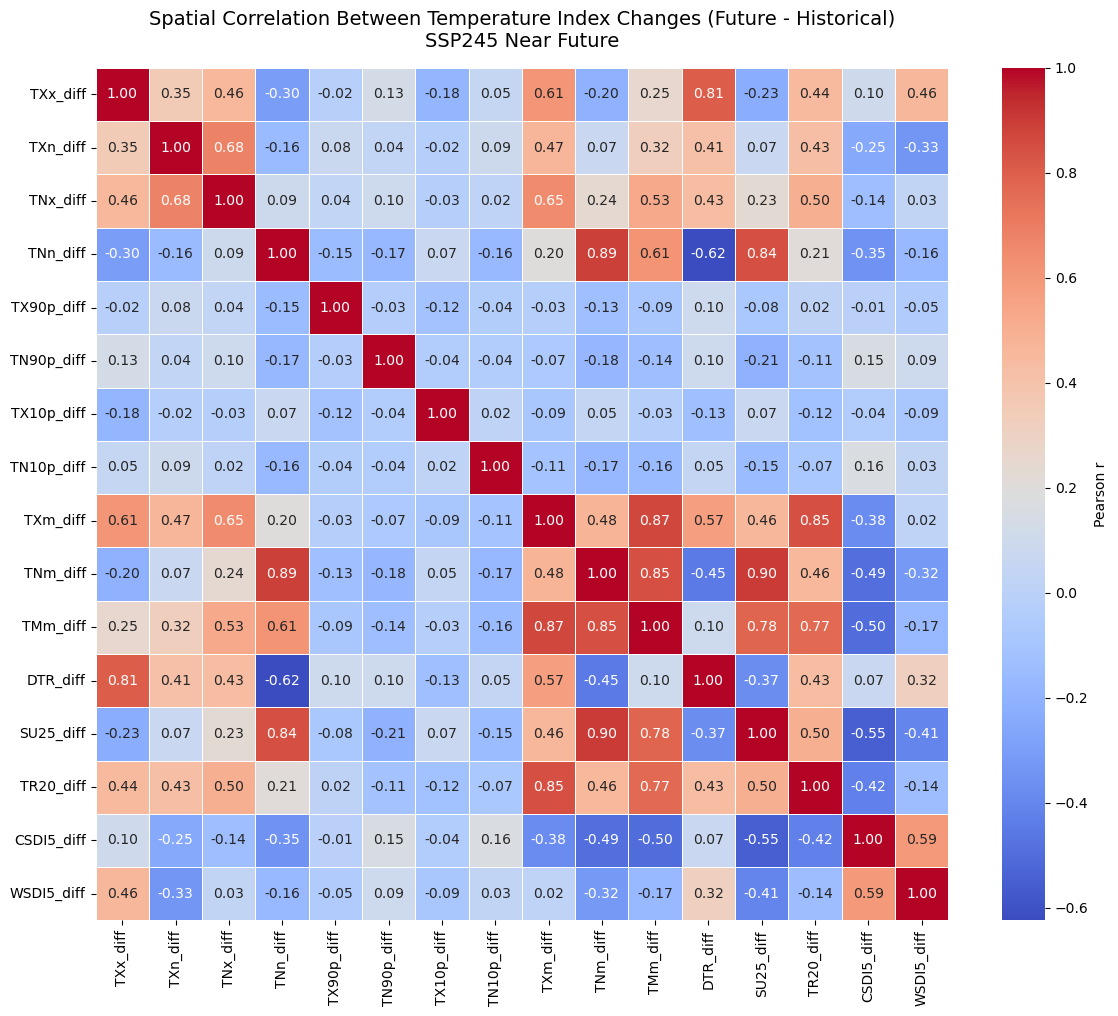

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.4,
    cbar_kws={'label': 'Pearson r'},
    square=True
)
plt.title("Spatial Correlation Between Temperature Index Changes (Future - Historical)\nSSP245 Near Future", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

# Statistical Test Value for all Precipitation index

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
hist_path = r"C:\New folder\Raw Excel\Hist.csv"
future_path = r"C:\New folder\Raw Excel\SSP 245 NF.csv"
out_csv = r"C:\New folder\Difference\SSP 245\Stats_Summary_Precip.csv"
df_hist = pd.read_csv(hist_path)
df_fut  = pd.read_csv(future_path)
variables = [
    "CDD", "CWD", "PRCPTOT", "SDII",
    "R10mm", "R20mm", "R30mm",
    "R95p", "R95PTOT", "R99p", "R99PTOT",
    "Rx1day", "Rx5day"
]
lat_col = df_hist.columns[0]
lon_col = df_hist.columns[1]
for df in (df_hist, df_fut):
    df["lat_round"] = df[lat_col].round(4)
    df["lon_round"] = df[lon_col].round(4)
results = []
for var in variables:
    print(f"\nVariable: {var}")
    if var not in df_hist.columns or var not in df_fut.columns:
        print(f"'{var}' not found in one of the datasets — skipping.")
        continue
    hist = df_hist[["lat_round", "lon_round", var]].copy()
    hist.columns = ["lat", "lon", "value_hist"]

    fut = df_fut[["lat_round", "lon_round", var]].copy()
    fut.columns = ["lat", "lon", "value_fut"]

    df = pd.merge(hist, fut, on=["lat", "lon"], how="inner")
    df.dropna(subset=["value_hist", "value_fut"], inplace=True)

    n = len(df)
    if n < 5:
        print(f"Not enough matched points for {var} (n={n}). Skipping.")
        continue
    d = df["value_fut"].to_numpy() - df["value_hist"].to_numpy()
    mean_diff = np.mean(d)
    median_diff = np.median(d)
    sd_diff = np.std(d, ddof=1)
    alpha = 0.05
    tcrit = stats.t.ppf(1 - alpha / 2, df=n - 1)
    ci_lower = mean_diff - tcrit * sd_diff / np.sqrt(n)
    ci_upper = mean_diff + tcrit * sd_diff / np.sqrt(n)
    t_stat, p_ttest = stats.ttest_rel(df["value_fut"], df["value_hist"])
    try:
        _, p_wilcoxon = stats.wilcoxon(d, zero_method="wilcox", alternative="two-sided")
    except ValueError:
        p_wilcoxon = np.nan
    cohens_dz = mean_diff / sd_diff if sd_diff != 0 else np.nan
    results.append({
        "Variable": var,
        "N": n,
        "Mean Change": mean_diff,
        "Median Change": median_diff,
        "95% CI Lower": ci_lower,
        "95% CI Upper": ci_upper,
        "t-test p": p_ttest,
        "Wilcoxon p": p_wilcoxon,
        "Cohen's dz": cohens_dz
    })
    print(f"Sample size: {n}")
    print(f"Mean change: {mean_diff:.4f} (95% CI: {ci_lower:.4f}, {ci_upper:.4f})")
    print(f"Median change: {median_diff:.4f}")
    print(f"Paired t-test p = {p_ttest:.6g}")
    print(f"Wilcoxon p      = {p_wilcoxon:.6g}")
    print(f"Cohen’s dz       = {cohens_dz:.3f}")


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



Variable: CDD
Sample size: 188
Mean change: -1.0577 (95% CI: -1.4416, -0.6738)
Median change: -1.8569
Paired t-test p = 1.69037e-07
Wilcoxon p      = 2.50509e-07
Cohen’s dz       = -0.396

Variable: CWD
Sample size: 188
Mean change: -1.5078 (95% CI: -1.6115, -1.4041)
Median change: -1.4500
Paired t-test p = 2.20213e-70
Wilcoxon p      = 5.08956e-32
Cohen’s dz       = -2.092

Variable: PRCPTOT
Sample size: 188
Mean change: 47.3002 (95% CI: 42.1216, 52.4788)
Median change: 42.4558
Paired t-test p = 9.76768e-43
Wilcoxon p      = 5.1737e-30
Cohen’s dz       = 1.314

Variable: SDII
Sample size: 188
Mean change: 0.5543 (95% CI: 0.5291, 0.5796)
Median change: 0.5695
Paired t-test p = 1.68031e-99
Wilcoxon p      = 1.33279e-32
Cohen’s dz       = 3.162

Variable: R10mm
Sample size: 188
Mean change: 0.1365 (95% CI: -0.0597, 0.3326)
Median change: -0.2159
Paired t-test p = 0.171507
Wilcoxon p      = 0.468159
Cohen’s dz       = 0.100

Variable: R20mm
Sample size: 188
Mean change: 1.1634 (95% CI: 0

In [2]:
results_df = pd.DataFrame(results)
print("\nSUMMARY TABLE")
print(results_df.to_string(index=False))


SUMMARY TABLE
Variable   N  Mean Change  Median Change  95% CI Lower  95% CI Upper     t-test p   Wilcoxon p  Cohen's dz
     CDD 188    -1.057736      -1.856923     -1.441625     -0.673847 1.690373e-07 2.505087e-07   -0.396424
     CWD 188    -1.507769      -1.450000     -1.611482     -1.404055 2.202128e-70 5.089560e-32   -2.091644
 PRCPTOT 188    47.300223      42.455828     42.121625     52.478821 9.767683e-43 5.173697e-30    1.314135
    SDII 188     0.554334       0.569545      0.529111      0.579558 1.680313e-99 1.332787e-32    3.161990
   R10mm 188     0.136478      -0.215897     -0.059665      0.332622 1.715068e-01 4.681586e-01    0.100110
   R20mm 188     1.163410       1.269231      0.974716      1.352104 1.874362e-25 3.681636e-20    0.887081
   R30mm 188     1.256713       1.293590      1.134129      1.379297 5.978821e-49 3.646773e-30    1.475000
    R95p 188    15.081049      15.515732     13.771791     16.390308 1.091725e-55 4.475636e-31    1.657277
 R95PTOT 188     0.303

# Correlation and Heatmap for all Precipitation Index

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hist_path  = r"C:\New folder\Raw Excel\Hist.csv"
future_path = r"C:\New folder\Raw Excel\SSP 245 NF.csv"
df_hist = pd.read_csv(hist_path)
df_fut  = pd.read_csv(future_path)
variables = [
    "CDD", "CWD", "PRCPTOT", "SDII",
    "R10mm", "R20mm", "R30mm",
    "R95p", "R95PTOT", "R99p", "R99PTOT",
    "Rx1day", "Rx5day"
]
lat_col = df_hist.columns[0]
lon_col = df_hist.columns[1]
for df in (df_hist, df_fut):
    df["lat_round"] = df[lat_col].round(4)
    df["lon_round"] = df[lon_col].round(4)
merged = pd.merge(
    df_hist[["lat_round", "lon_round"] + variables],
    df_fut[["lat_round", "lon_round"] + variables],
    on=["lat_round", "lon_round"],
    suffixes=("_hist", "_fut"),
    how="inner"
)
for var in variables:
    merged[f"{var}_diff"] = merged[f"{var}_fut"] - merged[f"{var}_hist"]
diff_cols = [f"{v}_diff" for v in variables]
corr_matrix = merged[diff_cols].corr(method="pearson")
print("\nSpatial Correlation Between Precipitation Index Changes (Future - Historical) [Pearson]")
print(corr_matrix.round(3))



Spatial Correlation Between Precipitation Index Changes (Future - Historical) [Pearson]
              CDD_diff  CWD_diff  PRCPTOT_diff  SDII_diff  R10mm_diff  \
CDD_diff         1.000     0.102        -0.175      0.203      -0.170   
CWD_diff         0.102     1.000         0.534      0.052       0.602   
PRCPTOT_diff    -0.175     0.534         1.000      0.380       0.934   
SDII_diff        0.203     0.052         0.380      1.000       0.104   
R10mm_diff      -0.170     0.602         0.934      0.104       1.000   
R20mm_diff       0.189     0.637         0.853      0.207       0.879   
R30mm_diff       0.032     0.275         0.730      0.244       0.635   
R95p_diff       -0.347     0.051         0.337      0.284       0.232   
R95PTOT_diff    -0.405     0.015         0.185      0.155       0.121   
R99p_diff        0.134     0.279         0.013     -0.322       0.188   
R99PTOT_diff     0.050     0.349         0.024     -0.256       0.194   
Rx1day_diff     -0.271     0.029   

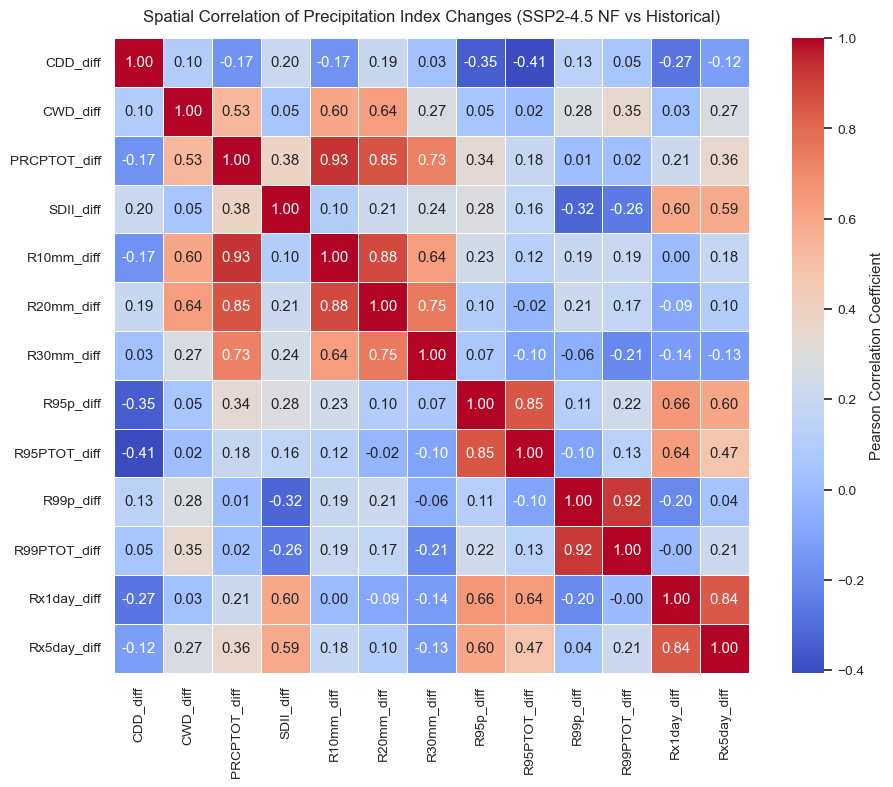

In [10]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.9)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Pearson Correlation Coefficient"}
)

plt.title("Spatial Correlation of Precipitation Index Changes (SSP2-4.5 NF vs Historical)", fontsize=12, pad=12)
plt.tight_layout()
plt.show()
